In [31]:
import pandas as pd
import numpy as np



In [144]:
df_Hospitalization_Discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
df_Demography=pd.read_excel("Cardiac_Outcomes.xlsx","Demography")
df_Patient_Precriptions=pd.read_excel("Cardiac_Outcomes.xlsx","Patient_Precriptions")
df_CardiacComplications=pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
df_Labs=pd.read_excel("Cardiac_Outcomes.xlsx","Labs")

# Q65.Which Admission Ward has maximum number of visits scheduled

In [199]:
Visit_countMax = df_Hospitalization_Discharge.groupby('admission_ward')["visit_times"].idxmax()
Visit_countMax
Visit_countMax.head(1)


admission_ward
Cardiology    1225
Name: visit_times, dtype: int64

# Q66.Display total count of patients in each discharge_department based on gender

In [167]:
#df_merged = pd.concat([df_Demography, df_Hospitalization_Discharge])
#df_grouped = merged_df.groupby(['discharge_department','gender']).size().unstack()
#df_grouped
df1=df_Hospitalization_Discharge
df2=df_Demography
df_Merged=pd.merge(df1,df2)
df_Merged
df_grouped = df_Merged.groupby(['discharge_department','gender']).size().unstack()
df_grouped

gender,Female,Male
discharge_department,,
Cardiology,993,710
GeneralWard,137,104
ICU,5,7
Others,28,24


# Q67.How many Unique patients were precribed each type of medication?

In [106]:
Unique_patients_Per_Medication = df_Patient_Precriptions.groupby('Drug_name')['inpatient_number'].nunique()
Unique_patients_Per_Medication

Drug_name
Aspirin enteric-coated tablet                        958
Atorvastatin calcium tablet                          822
Benazepril hydrochloride tablet                      434
Clopidogrel Hydrogen Sulphate tablet                 401
Deslanoside injection                               1017
Digoxin tablet                                       999
Dobutamine hydrochloride injection                    22
Enoxaparin Sodium injection                          113
Furosemide injection                                1720
Furosemide tablet                                   1641
Heparin Sodium injection                             153
Hydrochlorothiazide tablet                           283
Isoprenaline Hydrochloride injection                  30
Isosorbide Mononitrate Sustained Release tablet      326
Meglumine Adenosine Cyclophosphate for injection    1115
Metoprolol Succinate Sustained-release tablet        523
Milrinone injection                                  709
Nitroglycerin injecti

# Q68.Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [111]:
Filtered_patients = df_Hospitalization_Discharge[df_Hospitalization_Discharge['dischargeDay'] > 20]
#Filtered_patients
#selected_columns = df_Hospitalization_Discharge.loc[:, ['inpatient_number', 'dischargeDay', 'outcome_during_hospitalization']]
#selected_columns
Top_5_patients = Filtered_patients.nlargest(5, 'dischargeDay')
Top_5_patients
selected_columns=Top_5_patients.loc[:, ['inpatient_number', 'dischargeDay', 'outcome_during_hospitalization']]
selected_columns

,inpatient_number,dischargeDay,outcome_during_hospitalization
884,794077,123,Alive
1613,768711,118,Alive
1548,791880,88,Alive
1573,794784,82,Alive
1513,757711,76,Alive


# Q69.Get the list of patient ID's which are not there in prescriptions but in demographics

In [112]:
Demographics_IDs = set(df_Demography['inpatient_number'])
Prescriptions_IDs = set(df_Patient_Precriptions['inpatient_number'])
Missing_IDs = Demographics_IDs - Prescriptions_IDs
Missing_IDs_List = list(Missing_IDs)
Missing_IDs_List

[789308]

# Q70.On average, what is the most frequent weekday of admission?

In [121]:
df_Hospitalization_Discharge['weekday'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']).dt.dayofweek
Weekday_count = df_Hospitalization_Discharge['weekday'].value_counts()
Most_Frequent_Weekday = Weekday_count.index[0]
Weekday_Names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Most_Frequent_Weekday_Name = Weekday_Names[Most_Frequent_Weekday]
f"On average, the most frequent weekday of admission is {Most_Frequent_Weekday_Name}"

'On average, the most frequent weekday of admission is Monday'

# Q71.Which year had the maximum admissions

In [132]:
df_Hospitalization_Discharge['year'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']).dt.year
Max_Admissions_Year = df_Hospitalization_Discharge['year'].value_counts().idxmax()
f"The year with the maximum admissions is {Max_Admissions_Year}"

'The year with the maximum admissions is 2016'

# Q72.What % of the dataset is male vs female?

In [141]:
#Male_count = df_Demography['gender'].value_counts()['Male']
#Female_count = df_Demography['gender'].value_counts()['Female']
#Male_count
#Female_count
#Male_percentage = (Male_count / Total_Patients) * 100
#Female_percentage = (Female_count / Total_Patients) * 100
#Male_percentage
#Female_percentage
Gender_Count = df_Demography['gender'].value_counts()
Gender_Count
Total_Patients = len(df_Demography)
Gender_Percentage=(Gender_Count / Total_Patients) * 100
Gender_Percentage

gender
Female    57.918327
Male      42.081673
Name: count, dtype: float64

# Q73.Which patient in the youngest age category weighs the most?

In [196]:
df_Demography=pd.read_excel("Cardiac_Outcomes.xlsx","Demography")
df_YoungestAge = df_Demography[df_Demography.ageCat == df_Demography.ageCat.min()]
df_MaxWeight = df_YoungestAge.loc[df_YoungestAge['weight'].idxmax()]
#df_MaxWeight
Selected_Rows = df_MaxWeight[["inpatient_number","weight","ageCat"]]
Selected_Rows

inpatient_number    831184
weight                82.5
ageCat               21-29
Name: 1092, dtype: object

# Q74.Which adm ward had the lowest rate of Outcome Death?

In [166]:
Death_Rate = df_Hospitalization_Discharge.groupby('admission_ward')['outcome_during_hospitalization'].apply(lambda x: (x == 'Dead').sum() / len(x))
Lowest_Death_Rate_Outcome = Death_Rate.idxmin()
Lowest_Death_Rate_Outcome

'GeneralWard'

# Q75.What % of those with an outcome of death, had myocardial infarction?

In [128]:
#df1=df_Hospitalization_Discharge
#df2=df_CardiacComplications
#df_Merged=pd.merge(df1,df2)
#df_Merged
#df_Death = df_Merged[df_Merged['outcome_during_hospitalization'] == 'dead']
#df_Death
#df_MI = df_Merged[df_Merged['myocardial_infarction'] == '1']
#df_MI
#Total_DeathCount = len(df_Death)
#Total_DeathCount
#Total_MIcount=len(df_MI)
#Percentage_MI_Death=(Total_MIcount/Total_DeathCount)*100
#Percentage_MI_Death
DeathOutcome_count = df_Hospitalization_Discharge[df_Hospitalization_Discharge['outcome_during_hospitalization'] == 'Dead'][['inpatient_number','outcome_during_hospitalization']]
#DeathOutcome_count
Total_DeathCount=DeathOutcome_count['outcome_during_hospitalization'].value_counts().to_frame('count')
Total_DeathCount

,count
outcome_during_hospitalization,
Dead,11


In [118]:
Patient_MI = df_CardiacComplications[df_CardiacComplications['myocardial_infarction'] >0]
Patient_MI
Total_MI_Count=Common_inpatient_number['myocardial_infarction'].value_counts().to_frame('count')
Total_MI_Count
#Common_inpatient_number = pd.merge(DeathOutcome_count,Patient_MI, how='inner', on=['inpatient_number'])
#Common_inpatient_number

,count
myocardial_infarction,
1,1


In [116]:
Percentage_MI_Death=(1/11)*100
Percentage_MI_Death

9.090909090909092

# Q19.Create a bar chart by making list on Avg BMI and occupation column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method

In [133]:
import matplotlib.pyplot as plt


# Q76.What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [119]:
CHF_Patients = df_CardiacComplications[df_CardiacComplications['congestive_heart_failure'] > 0]
#CHF_Patients
CHF_Count=CHF_Patients['congestive_heart_failure'].value_counts().to_frame('count')
CHF_Count


,count
congestive_heart_failure,
1,1872


In [120]:
Typeof_HF_Patients = df_CardiacComplications[df_CardiacComplications['type_of_heart_failure'] == 'Both']
#Typeof_HF_Patients
Typeof_HF_Count=Typeof_HF_Patients['type_of_heart_failure'].value_counts().to_frame('count')
Typeof_HF_Count

,count
type_of_heart_failure,
Both,1480


In [125]:
CHF_Typeof_HF_Ratio=1872/1480
CHF_Typeof_HF_Ratio
#Ratio=CHF_Count['>0'] / Typeof_HF_Count['Both']
#Ratio

1.2648648648648648

# Q77.LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death) 

# Q78.Give the count of patients who have experinced tachicardia or bradycardia.

In [163]:
Pulse_Range = [df_Labs['pulse'] <60,df_Labs['pulse'] >60,df_Labs['pulse'] >100]
Pulse_Categories = ['brachycardia','Normal','tachycardia']
df['Pulse_Categories'] = np.select(Pulse_Range,Pulse_Categories)
df['Pulse_Categories']
Patients_PulseCategories = df['Pulse_Categories'] .value_counts()
Patients_PulseCategories
Brachycardia=Patients_PulseCategories.iloc[1]
f"The count of patients who have Brachycardia is {Brachycardia}"

'The count of patients who have Brachycardia is 154'

# Q79.Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

In [126]:
bins = [-np.inf, 18.5, 25, 30, np.inf]
labels = ['underweight','Normal Weight','overweight','obese']
df['BMI_categories'] = pd.cut(df_Demography['BMI'], bins=bins, labels=labels)
df['BMI_categories']

0       Normal Weight
1       Normal Weight
2       Normal Weight
3       Normal Weight
4               obese
            ...      
2003      underweight
2004    Normal Weight
2005       overweight
2006      underweight
2007    Normal Weight
Name: BMI_categories, Length: 2008, dtype: category
Categories (4, object): ['underweight' < 'Normal Weight' < 'overweight' < 'obese']

In [131]:
BMI_Range = [df_Demography['BMI'] < 18.5,df_Demography['BMI'] < 25,df_Demography['BMI'] < 30,df_Demography['BMI'] >= 30]
BMI_Categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
df['BMI_categories'] = np.select(BMI_Range,BMI_Categories)
df['BMI_categories']

0       Normal Weight
1       Normal Weight
2       Normal Weight
3       Normal Weight
4               Obese
            ...      
2003      Underweight
2004    Normal Weight
2005       Overweight
2006      Underweight
2007    Normal Weight
Name: BMI_categories, Length: 2008, dtype: object

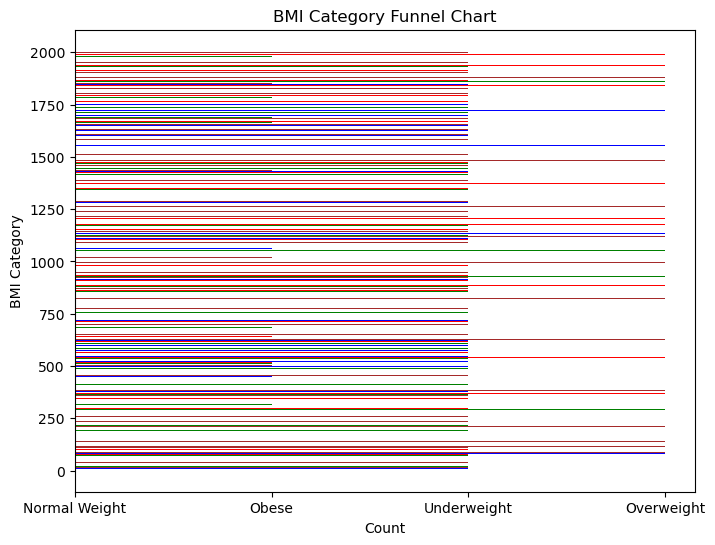

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(df['BMI_categories'].index,df['BMI_categories'].values, color=['green','red','blue','brown'])
plt.xlabel('Count')
plt.ylabel('BMI Category')
plt.title('BMI Category Funnel Chart')
plt.show()

# Q80.Delete the column age from Q26 iteratively.